## EXIF Metadata in Images

In [48]:
import os
import cv2
import exif
import numpy as np
import matplotlib.pyplot as plt

### Function to check EXIF contents

In [49]:
def check_exif(img):
    if img.has_exif:
        print('The image contains EXIF information.')
    else:
        print('EXIF info not found.')

### Load Image

In [61]:
im_org = exif.Image('image-original.JPG')
check_exif(im_org)

The image contains EXIF information.


In [62]:
img = cv2.imread('original.JPG')
# Save using OpenCV imwrite.
cv2.imwrite('OpenCV_write.JPG', img)

True

In [63]:
im_cv = exif.Image('OpenCV_write.JPG')
check_exif(im_cv)

EXIF info not found.


In [64]:
# Check image sizes.
original_size = os.path.getsize('original.JPG')
print('Original Image Size : ', int(original_size/1024), 'kb')

opencv_img_size = os.path.getsize('OpenCV_write.JPG')
print('OpenCV Image Size : ', int(opencv_img_size/1024), 'kb')

Original Image Size :  3274 kb
OpenCV Image Size :  2234 kb


### Check Available Tags
Let's check what are the different data available in exif.

In [65]:
dir(im_org)

['_exif_ifd_pointer',
 '_gps_ifd_pointer',
 '_interoperability_ifd_Pointer',
 '_segments',
 'aperture_value',
 'artist',
 'body_serial_number',
 'camera_owner_name',
 'color_space',
 'components_configuration',
 'compression',
 'copyright',
 'custom_rendered',
 'datetime',
 'datetime_digitized',
 'datetime_original',
 'delete',
 'delete_all',
 'exif_version',
 'exposure_bias_value',
 'exposure_mode',
 'exposure_program',
 'exposure_time',
 'f_number',
 'flash',
 'flashpix_version',
 'focal_length',
 'focal_plane_resolution_unit',
 'focal_plane_x_resolution',
 'focal_plane_y_resolution',
 'get',
 'get_all',
 'get_file',
 'get_thumbnail',
 'gps_latitude',
 'gps_longitude',
 'gps_version_id',
 'has_exif',
 'jpeg_interchange_format',
 'jpeg_interchange_format_length',
 'lens_model',
 'lens_serial_number',
 'lens_specification',
 'list_all',
 'make',
 'maker_note',
 'metering_mode',
 'model',
 'offset_time',
 'offset_time_digitized',
 'offset_time_original',
 'orientation',
 'photographic_s

### Access Some Tags
We will retrieve the following EXIF tags.
- Camera model
- Camera owner
- Location
- Thumbnail

In [66]:
# Model.
im_org.get('model')

'Canon EOS 5D Mark IV'

In [67]:
# Camera Owner.
im_org.get('artist')

'SELVAPRAKASH LAKSHMANAN'

In [68]:
# Location.
im_org.get('gps_latitude')

(32.0, 46.0, 42.52439969016267)

In [69]:
im_org.get('gps_longitude')

(117.0, 4.0, 22.8216)

EXIF retains thumbnail information in byteArray format. We need to convert it into a numpy array for visualization using matplotlib. The byteArray can be decoded using OpenCV function imdecode as shown below.

In [80]:
thumbnail = im_org.get_thumbnail()

In [81]:
print(thumbnail)

bytearray(b'\xff\xd8\xff\xdb\x00\x84\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x01\x01\x01\x01\x01\x02\x02\x02\x02\x02\x03\x03\x03\x03\x03\x03\x03\x03\x03\x04\x04\x04\x03\x03\x04\x03\x03\x03\x04\x05\x04\x04\x05\x05\x05\x05\x05\x03\x04\x05\x06\x05\x05\x06\x04\x05\x05\x05\x01\x01\x01\x01\x01\x01\x01\x02\x01\x01\x02\x05\x03\x03\x03\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\x05\xff\xc0\x00\x11\x08\x00x\x00\xa0\x03\x01!\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\

In [82]:
decoded = cv2.imdecode(np.frombuffer(thumbnail, np.uint8), -1)
print(type(decoded))

<class 'numpy.ndarray'>


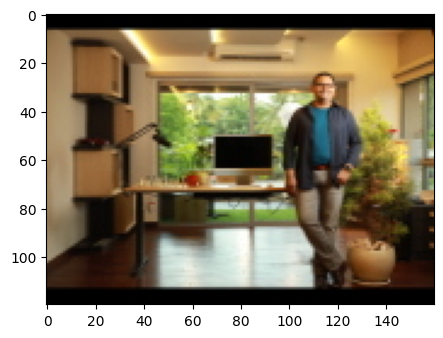

In [83]:
plt.figure(figsize = (5,5))
plt.imshow(decoded[...,::-1]);

### Modify EXIF tags
Let’s modify the camera model and the location as an example. We need to update the changes after that.

In [18]:
# Modify Camera Model.
previous_model = original.get('model')
modified_model = 'Canon EOS 5D Mark IV'
original.model = modified_model
print('Previous Model : ', previous_model)
print('Modified Model : ', modified_model)

Previous Model :  Nikon
Modified Model :  Canon EOS 5D Mark IV


In [65]:
# Modify Location.
previous_lat = img_org.get('gps_latitude')
previous_long = img_org.get('gps_longitude')

img_org.gps_latitude = (38, 53, 52.8576)
img_org.gps_longitude = (77, 2, 11.706)

print('Previous Coordinates \n')
print('\t Latitude : ', previous_lat)
print('\t Longitude : ', previous_long)

print('\nUpdated Coordinates \n')
print('\t Latitude : ', img_org.get('gps_latitude'))
print('\t Longitude : ', img_org.get('gps_longitude'))

Previous Coordinates 

	 Latitude :  (32.0, 46.0, 42.52439969016267)
	 Longitude :  (117.0, 4.0, 22.8216)

Updated Coordinates 

	 Latitude :  (38.0, 53.0, 52.8576)
	 Longitude :  (77.0, 2.0, 11.706)


In [47]:
# Update the changes.
with open('original.JPG', 'wb') as file:
    file.write(im_org.get_file())